To tackle the main problem, we are going to perform unsupervised learning, conducting description tasks. 
We will segregate the physicians into different groups, each group fulfilling similar features.
Firstly, we will perform K-Means. This is an algorithm simple to implement, that scales to large data sets and guarantees convergence.

In [1]:
# 1. CLUSTERING GENERAL PREPROCESSING 
# Clustering is an unsupervised learning method which can be used to discover the underlying pattern in the data structure.  
# For example, it can be used to group unlabelled data

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score


df=pd.read_csv('stress_study.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(5).to_html()))



,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Alcohol_usage,Stress_nervous_habits,Stress_makes_nervous,Stress_affects_emotions
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
3,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
4,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2


In [2]:

# 1.1 Check whether there are missing values replace those by the mean of each feature

    # chech if there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())

print('-------------------x-------------------')
print('-------------------x-------------------')



     # replace missing values in numerical variables by using mean value
df["Source_of_stress"].fillna(df["Source_of_stress"].mean(), inplace=True)


    # check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
    

ColumnName, DataType, MissingValues
Age , int64 , False
Gender , int64 , False
Sector , int64 , False
Working_same_sector , int64 , False
Specialization , int64 , False
Work_hours , int64 , False
Work_years_span , int64 , False
Patient_per_day , int64 , False
Overtime_work_interest , int64 , False
Overtime_work_paid , int64 , False
Stressed_during_work , int64 , False
Feeling_on_job , int64 , False
Source_of_stress , float64 , True
Handling_stress , int64 , False
Inform_Management_problems , int64 , False
Management_initiative_to_problems , int64 , False
Hospital_care_towards_stress , int64 , False
Stress_affecting_patient_care , int64 , False
Stress_affecting_concentration , int64 , False
Effort_to_reduce_stress_to_improve_concentration , int64 , False
Stress_due_to_too_many_duties , int64 , False
Stress_due_to_age , int64 , False
Stress_reason_family , int64 , False
Stress_due_to_competition , int64 , False
Prefer_to_stay_alone , int64 , False
Prefer_taking_responsibilities , int64 ,

Number of PCs:  17


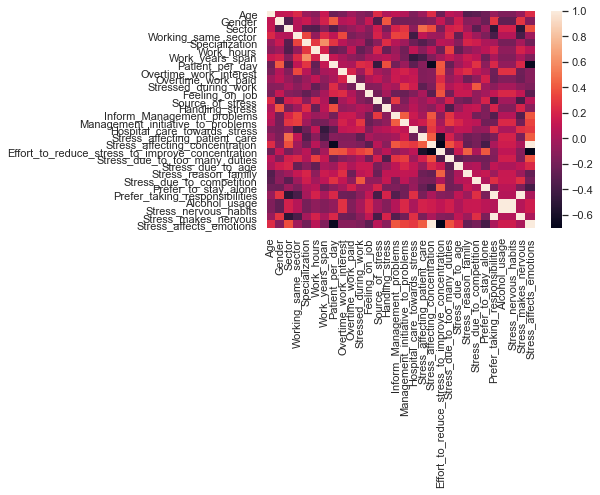

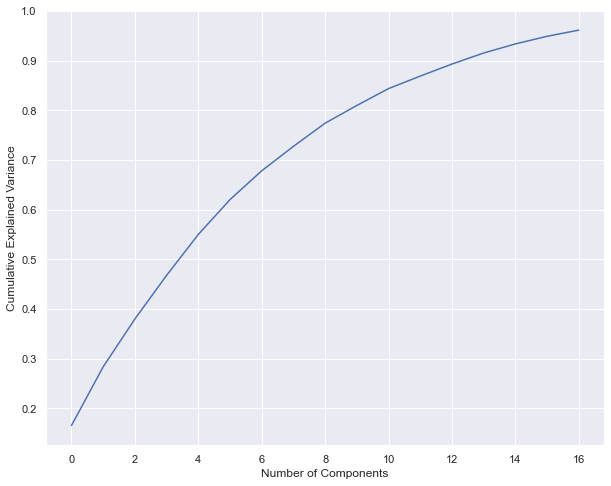

<AxesSubplot:>

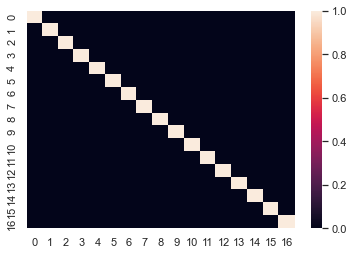

In [3]:

# 1.2 PCA

    # correlation matrix to see if we perform PCA

corr_graph = df.corr() # Heat map of correlation matrix
sns.heatmap(corr_graph, 
        xticklabels=corr_graph.columns,
        yticklabels=corr_graph.columns)


    # PCA using 96% variance 

scalerPCA = MinMaxScaler()
Xscaled = scalerPCA.fit_transform(df)
pca = PCA(n_components=0.96)  
pca.fit(Xscaled)
Xreduced = pca.transform(Xscaled)
df_red = pd.DataFrame(Xreduced)

print("Number of PCs: ",pca.n_components_)

    # Seeing the relation between the variance and the number of components
    # To select the right variance
plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


corr_graph = df_red.corr() # Heat map of correlation matrix
sns.heatmap(corr_graph, 
        xticklabels=corr_graph.columns,
        yticklabels=corr_graph.columns)




In [4]:
# 2. K-Means Clustering NO FEATURE REDUCTION
# Requirements: numerical and normalized features


# Data preprocessing

print('Column Datatypes:\n',df.dtypes)
# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_prep=df.copy(deep=True) 


display('Data Example:',HTML(df_prep.head(10).to_html()))

# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_prep.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df_prep[col]=(df_prep[col]-df_prep[col].min())/(df_prep[col].max()-df_prep[col].min())



Column Datatypes:
 Age                                                   int64
Gender                                                int64
Sector                                                int64
Working_same_sector                                   int64
Specialization                                        int64
Work_hours                                            int64
Work_years_span                                       int64
Patient_per_day                                       int64
Overtime_work_interest                                int64
Overtime_work_paid                                    int64
Stressed_during_work                                  int64
Feeling_on_job                                        int64
Source_of_stress                                    float64
Handling_stress                                       int64
Inform_Management_problems                            int64
Management_initiative_to_problems                     int64
Hospital_care_towards

'Data Example:'

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Alcohol_usage,Stress_nervous_habits,Stress_makes_nervous,Stress_affects_emotions
0,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
1,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
2,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
3,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
4,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
5,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
6,2,1,2,2,6,3,1,1,1,1,1,2,3.0,2,1,2,2,2,2,2,1,1,2,1,1,1,1,1,1,2
7,1,2,2,2,9,1,2,4,1,2,1,2,1.0,5,2,3,2,2,2,2,1,1,2,1,1,1,1,1,1,2
8,1,2,2,2,9,1,2,4,1,2,1,2,1.0,5,2,3,2,2,2,2,1,1,2,1,1,1,1,1,1,2
9,1,2,2,2,9,1,2,4,1,2,1,2,1.0,5,2,3,2,2,2,2,1,1,2,1,1,1,1,1,1,2


Selected numerical columns:
 ['Age', 'Gender', 'Sector', 'Working_same_sector', 'Specialization', 'Work_hours', 'Work_years_span', 'Patient_per_day', 'Overtime_work_interest', 'Overtime_work_paid', 'Stressed_during_work', 'Feeling_on_job', 'Source_of_stress', 'Handling_stress', 'Inform_Management_problems', 'Management_initiative_to_problems', 'Hospital_care_towards_stress', 'Stress_affecting_patient_care', 'Stress_affecting_concentration', 'Effort_to_reduce_stress_to_improve_concentration', 'Stress_due_to_too_many_duties', 'Stress_due_to_age', 'Stress_reason_family', 'Stress_due_to_competition', 'Prefer_to_stay_alone', 'Prefer_taking_responsibilities', 'Alcohol_usage', 'Stress_nervous_habits', 'Stress_makes_nervous', 'Stress_affects_emotions']


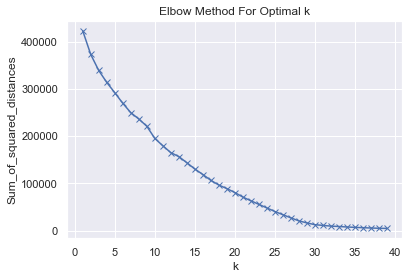

In [9]:
# 2.1. KMeans clustering 

# NO FEATURE REDUCTION AND NO FEATURE SELECTION

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans


# 2.1.1 try different K value and find the best K for KMeans
    # Assumption: SSE is smaller, it is better

df_km=df_prep.copy(deep=True)    
Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k, random_state=1, algorithm='full')
    km = km.fit(df_km)
    Sum_of_squared_distances.append(km.inertia_)
    
    # Plot K and SSE, observe which one is better
    # In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



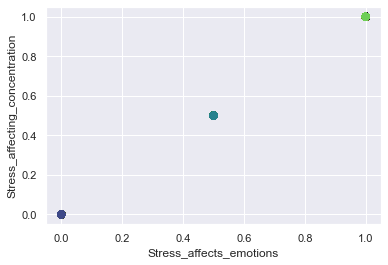

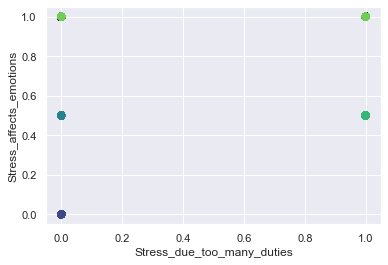

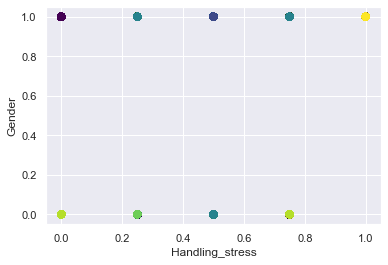

[5 5 5 ... 2 2 2]


'Data:'

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Alcohol_usage,Stress_nervous_habits,Stress_makes_nervous,Stress_affects_emotions,Cluster
99990,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99991,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99992,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99993,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99994,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99995,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99996,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99997,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99998,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2
99999,0.0,1.0,0.0,1.0,0.454545,0.5,0.5,0.666667,1.0,1.0,0.5,0.333333,0.5,0.5,0.0,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,2


[5 1 3 8 2 6 7 0 9 4]
Number of physicians in each cluster: 
 4    13306
9    12309
0    11020
5    10204
2    10055
7     9952
8     9939
3     9884
1     6669
6     6662
Name: Cluster, dtype: int64
silhouette_avg 
 0.37675205840501463


In [10]:
# 2.1.2 K-Means with the optimal number of cluster K
from sklearn.metrics import silhouette_samples, silhouette_score

kmeans=KMeans(n_clusters=10, random_state=1, algorithm='full')
kmeans.fit(df_km)
y_pred=kmeans.predict(df_km)

    # Perform a visualization of clusters and different features


plt.scatter(df_km['Stress_affects_emotions'],df_km['Stress_affecting_concentration'],c=y_pred, s=50, cmap='viridis')
plt.xlabel('Stress_affects_emotions')
plt.ylabel('Stress_affecting_concentration')
plt.show()

plt.scatter(df_km['Stress_due_to_too_many_duties'],df_km['Stress_affects_emotions'],c=y_pred, s=50, cmap='viridis')
plt.xlabel('Stress_due_too_many_duties')
plt.ylabel('Stress_affects_emotions')
plt.show()


plt.scatter(df_km['Handling_stress'],df_km['Gender'],c=y_pred, s=50, cmap='viridis')
plt.xlabel('Handling_stress')
plt.ylabel('Gender')
plt.show()




# Get the cluster labels and add it back to the original data
opt=kmeans.labels_
print(opt)
df_km['Cluster']=opt
display('Data:',HTML(df_km.tail(10).to_html()))
_clusters=df_km['Cluster'].unique()
print(_clusters)

counting=df_km['Cluster'].value_counts()

print("Number of physicians in each cluster: \n",counting)


# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(df_prep, opt)
print("silhouette_avg \n",silhouette_avg)



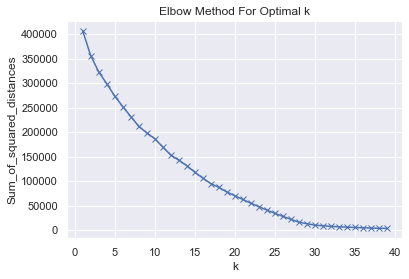

In [11]:
# 2.2. K-Means Clustering with FEATURE REDUCTION - PCA 
# Requirements: numerical and normalized features -> PCA has normalized features

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans

# 3.2. Try different K value and find the best K for KMeans
    # Assumption: SSE is smaller, it is better

Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k, random_state=1, algorithm='full')
    km = km.fit(df_red)
    Sum_of_squared_distances.append(km.inertia_)
    
    # Plot K and SSE, observe which one is better
    # In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



Number of physicians in each cluster: 
 5    16614
2    14516
7    13219
3    10055
8     9994
1     9991
4     8955
6     6669
0     6633
9     3354
Name: Cluster, dtype: int64


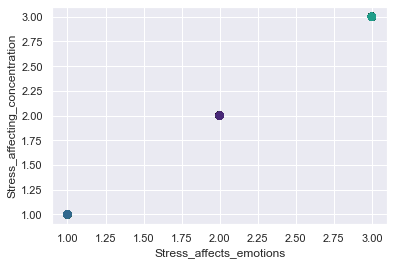

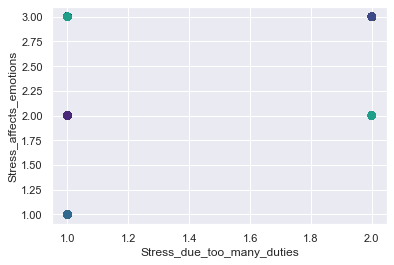

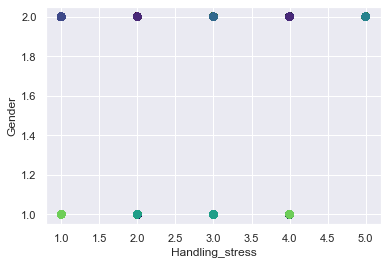

silhouette_avg 
 0.37120681102055214


In [19]:

# 2.2.1 Performing some visualization of data

counting=df_pca_kmeans['Cluster'].value_counts()

print("Number of physicians in each cluster: \n",counting)

plt.scatter(df_pca_kmeans['Stress_affects_emotions'],df_pca_kmeans['Stress_affecting_concentration'],c=y_pred, s=50, cmap='viridis')
plt.xlabel('Stress_affects_emotions')
plt.ylabel('Stress_affecting_concentration')
plt.show()

plt.scatter(df_pca_kmeans['Stress_due_to_too_many_duties'],df_pca_kmeans['Stress_affects_emotions'],c=y_pred, s=50, cmap='viridis')
plt.xlabel('Stress_due_too_many_duties')
plt.ylabel('Stress_affects_emotions')
plt.show()


plt.scatter(df_pca_kmeans['Handling_stress'],df_pca_kmeans['Gender'],c=y_pred, s=50, cmap='viridis')
plt.xlabel('Handling_stress')
plt.ylabel('Gender')
plt.show()



# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
silhouette_avg = silhouette_score(df_red, kmeans.labels_)
print("silhouette_avg \n",silhouette_avg)

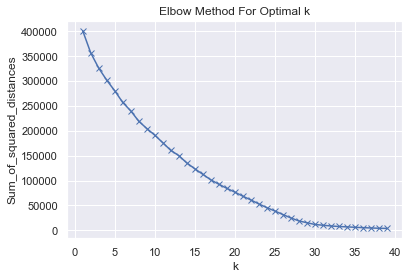

In [11]:
# . 2.3 K-Means Clustering with FEATURE SELECTION

# 4.1 DROP THE EACH 1 FEATURE THAT GIVES A CORRELATION=1 WITH ANOTHER ONE

# Stress_makes_nervous
# Stress_affects_emotions
# Alcohol_usage


# 4.2. try different K value and find the best K for KMeans
    # Assumption: SSE is smaller, it is better

df_km_fs=df_prep.copy(deep=True) 

df_km_fs=df_km_fs.drop('Stress_makes_nervous',1)
df_km_fs=df_km_fs.drop('Stress_affects_emotions',1)
df_km_fs=df_km_fs.drop('Alcohol_usage',1)




Sum_of_squared_distances = []
K = range(1,40)
for k in K:
    km = KMeans(n_clusters=k, random_state=1, algorithm='full')
    km = km.fit(df_km_fs)
    Sum_of_squared_distances.append(km.inertia_)
    
    # Plot K and SSE, observe which one is better
    # In the plot, the elbow on the arm is optimal k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



# K=6-7. It is a worse model than before because we get higher SSE.


In [14]:
# 3. DBSCAN - Density-based Clustering using PCA
 
from sklearn.cluster import DBSCAN

df_pca_dbscan=df_red.copy(deep=True) 
display('Data:',HTML(df_pca_dbscan.tail(10).to_html()))



'Data:'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
99990,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99991,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99992,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99993,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99994,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99995,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99996,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99997,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99998,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674
99999,1.514984,0.57898,0.531213,-0.261244,0.081317,-0.192357,0.453326,0.46668,-0.297927,0.346978,-0.320016,-0.288524,-0.313644,0.01112,-0.208469,0.288923,0.261674


In [18]:
# Different DBSCAN trials
db_default = DBSCAN(eps = 0.2, min_samples = 3).fit(df_pca_dbscan) 
labels = db_default.labels_ 
df_pca_dbscan = df.copy(deep=True) 
df_pca_dbscan['Cluster']=labels
display('Data after clustering:',HTML(df_pca_dbscan.tail(10).to_html()))




db_pca_dbscan = DBSCAN(eps = 0.5, min_samples = 2500, algorithm='brute').fit(df_pca_dbscan) 
df_pca_dbscan['Cluster']=db_pca_dbscan.labels_
counting=df_pca_dbscan['Cluster'].value_counts()
print('0.5 / 2800 / brute', counting)



db_pca_dbscan = DBSCAN(eps = 0.7, min_samples = 2300, algorithm='ball_tree').fit(df_pca_dbscan) 
df_pca_dbscan['Cluster']=db_pca_dbscan.labels_
counting=df_pca_dbscan['Cluster'].value_counts()
print('0.7 / 2300 / ball tree', counting)



'Data after clustering:'

,Age,Gender,Sector,Working_same_sector,Specialization,Work_hours,Work_years_span,Patient_per_day,Overtime_work_interest,Overtime_work_paid,Stressed_during_work,Feeling_on_job,Source_of_stress,Handling_stress,Inform_Management_problems,Management_initiative_to_problems,Hospital_care_towards_stress,Stress_affecting_patient_care,Stress_affecting_concentration,Effort_to_reduce_stress_to_improve_concentration,Stress_due_to_too_many_duties,Stress_due_to_age,Stress_reason_family,Stress_due_to_competition,Prefer_to_stay_alone,Prefer_taking_responsibilities,Alcohol_usage,Stress_nervous_habits,Stress_makes_nervous,Stress_affects_emotions,Cluster
99990,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99991,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99992,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99993,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99994,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99995,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99996,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99997,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99998,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69
99999,1,2,1,2,6,2,2,3,2,2,2,2,3.0,3,1,1,2,1,1,3,1,1,2,2,1,1,4,4,1,1,69


0.5 / 2800 / brute -1     24303
 5      3354
 2      3354
 0      3318
 18     3315
 3      3290
 21     3283
 17     3279
 8      3251
 19     3231
 22     3212
 9      3212
 10     3199
 12     3192
 11     3173
 20     3167
 7      3160
 4      3121
 16     3101
 13     3082
 1      3068
 14     3047
 23     3027
 15     2637
 6      2624
Name: Cluster, dtype: int64
0.7 / 2300 / ball tree -1     21960
 5      3354
 2      3354
 0      3318
 19     3315
 3      3290
 22     3283
 18     3279
 8      3251
 20     3231
 23     3212
 9      3212
 10     3199
 12     3192
 11     3173
 21     3167
 7      3160
 4      3121
 17     3101
 14     3082
 1      3068
 15     3047
 24     3027
 16     2637
 6      2624
 13     2343
Name: Cluster, dtype: int64


In [19]:
db_pca_dbscan = DBSCAN(eps = 0.7, min_samples = 2000, algorithm='ball_tree').fit(df_pca_dbscan) 
labels =db_pca_dbscan.labels_
df_pca_dbscan['Cluster']=db_pca_dbscan.labels_
counting=df_pca_dbscan['Cluster'].value_counts()
print('0.7 / 2000 / ball tree', counting)

0.7 / 2000 / ball tree -1     15458
 5      3354
 2      3354
 0      3318
 22     3315
 3      3290
 25     3283
 21     3279
 9      3251
 23     3231
 26     3212
 10     3212
 11     3199
 14     3192
 13     3173
 24     3167
 8      3160
 4      3121
 20     3101
 16     3082
 1      3068
 17     3047
 27     3027
 18     2637
 6      2624
 15     2343
 7      2215
 19     2184
 12     2103
Name: Cluster, dtype: int64


In [16]:
# Visualize the clusters

# Building the label to colour mapping 
# Need to figure out how many clusters were produced, then assign different number of the colors
colours = {} 
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'yellow'
colours[4] = 'brown'
colours[5] = 'purple'
colours[6] = 'black'
colours[7] = 'orange'
colours[8] = 'pink'
colours[9] = 'gray'
colours[10] = 'lightgreen'
colours[11] = 'lightblue'
colours[12] = 'lavender'
colours[13] = 'cyan'
colours[14] = 'magenta'
colours[15] = 'darkblue'
colours[16] = 'skyblue'
colours[17] = 'violet'
colours[18] = 'gold'
colours[19] = 'aquamarine'
colours[20] = 'mediumseagreen'
colours[21] = 'olive'
colours[22] = 'orchid'
colours[23] = 'teal'
colours[24] = 'lightgray'
colours[25] = 'chocolate'
colours[26] = 'salmon'
colours[27] = 'silver'

colours[-1] = 'k'
  
# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 
  
# For the construction of the legend of the plot 
r = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='r'); 
g = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='g'); 
b = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='b'); 
yellow = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='yellow');  
brown = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='brown'); 
purple = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='purple'); 
black = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='black'); 
orange = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='orange'); 
pink = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='pink'); 
gray = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='gray'); 
lightgreen = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='lightgreen');
lavender = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='lavender'); 
cyan = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='cyan'); 
magenta = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='magenta'); 
darkblue = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='darkblue'); 
skyblue = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='skyblue'); 
violet = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='violet'); 
gold = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='gold'); 
aquamarine = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='aquamarine'); 
mediumseagreen = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='mediumseagreen'); 
olive = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='olive'); 
orchid = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='orchid'); 
teal = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='teal'); 
lightgray = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='lightgray'); 
chocolate = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='chocolate'); 
salmon = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='salmon'); 
silver = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='silver'); 
k = plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], color ='k'); 


# Plotting P1 on the X-Axis and P2 on the Y-Axis  
# according to the colour vector defined 
plt.figure(figsize =(9, 9)) 
plt.scatter(df_pca_dbscan['Handling_stress'], df_pca_dbscan['Gender'], c = cvec)   
# Building the legend 
plt.legend((r, g, b, k, yellow, brown, purple, black , orange, pink, gray,lightgreen ,lavender, cyan, magenta, darkblue,skyblue, violet , gold, aquamarine , mediumseagreen, olive, orchid, teal, lightgray, chocolate, salmon, silver), ('Label 0', 'Label 1', 'Label 2', 'Label -1',  'Label 3', 'Label 4', 'Label 5', 'Label 6', 'Label 7', 'Label 8', 'Label 9', 'Label 10', 'Label 11', 'Label 12', 'Label 13', 'Label 14', 'Label 15', 'Label 16', 'Label 17',  'Label 18', 'Label 19', 'Label 20', 'Label 21',  'Label 22', 'Label 23', 'Label 24', 'Label 25', 'Label 26', 'Label 27' ))   
plt.xlabel('Handling_stress')
plt.ylabel('Gender')
plt.show()




KeyError: 28